# CALIDAD DE DATOS

<h1>Archivo : HECHOS.CSV</h1> 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Ignorar todos los warnings
warnings.filterwarnings("ignore")

In [3]:
# cargamos el archivo
df = pd.read_csv(r'..\CSV\hechos.csv', sep=',', encoding='ANSI')

In [4]:
# vemos la primer linea para identificar columna y datos
df.head(1)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1.0,1/1/2016,2016.0,1.0,1.0,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


In [5]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [6]:
# obtenemos la info del datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    float64
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    float64
 4   MM                     696 non-null    float64
 5   DD                     696 non-null    float64
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    float64
 15  XY

<h2>Normalizacion de los datos</h2>

Normalizamos el nombre de las columnas

In [7]:
# Convertir los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()

In [8]:
# Reemplazar los espacios por guiones bajos en los nombres de las columnas
df.columns = df.columns.str.replace(' ', '_')

In [9]:
# Renombramos la columna id a id_hecho para brindar mas informacion del contenido de la columna
df = df.rename(columns={'id':'id_hecho'})

<h2>Analizamos los datos</h2>

In [10]:
# Observamos los datos
df.head(3)

,id_hecho,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,dirección_normalizada,comuna,xy_(caba),pos_x,pos_y,participantes,victima,acusado
0,2016-0001,1.0,1/1/2016,2016.0,1.0,1.0,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1.0,1/2/2016,2016.0,1.0,2.0,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1.0,1/3/2016,2016.0,1.0,3.0,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [11]:
# Revisamos los registros duplicados
duplicados = df[df.duplicated()]
duplicados

,id_hecho,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,dirección_normalizada,comuna,xy_(caba),pos_x,pos_y,participantes,victima,acusado
697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Eliminamos registros duplicados
df.drop_duplicates(inplace=True)

In [13]:
# Contar valores NaN por columnas
valores_nulos_por_columna = df.isna().sum()
valores_nulos_por_columna

id_hecho                   1
n_victimas                 1
fecha                      1
aaaa                       1
mm                         1
dd                         1
hora                       1
hh                         1
lugar_del_hecho            1
tipo_de_calle              1
calle                      2
altura                   568
cruce                    172
dirección_normalizada      9
comuna                     1
xy_(caba)                  1
pos_x                      1
pos_y                      1
participantes              1
victima                    1
acusado                    1
dtype: int64

In [14]:
# Mostrar los registros que contienen valores nulos en alguna columna
registros_con_nulos = df[df.isnull().any(axis=1)]
registros_con_nulos

,id_hecho,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,dirección_normalizada,comuna,xy_(caba),pos_x,pos_y,participantes,victima,acusado
0,2016-0001,1.0,1/1/2016,2016.0,1.0,1.0,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1.0,1/2/2016,2016.0,1.0,2.0,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1.0,1/3/2016,2016.0,1.0,3.0,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1.0,1/10/2016,2016.0,1.0,10.0,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1.0,1/21/2016,2016.0,1.0,21.0,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1.0,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,2021-0094,1.0,12/20/2021,2021.0,12.0,20.0,1:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9.0,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1.0,12/30/2021,2021.0,12.0,30.0,0:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,NaN,TERRADA,GAONA AV. y TERRADA,11.0,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1.0,12/15/2021,2021.0,12.0,15.0,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071.0,NaN,"PERON, EVA AV. 4071",9.0,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS
695,2021-0097,1.0,11/18/2021,2021.0,11.0,18.0,6:10:00,6,PADRE CARLOS MUJICA 709,CALLE,PADRE CARLOS MUJICA,709.0,NaN,PADRE CARLOS MUGICA 709,1.0,Point (107664.16647795 104708.63962087),-58.37976155,-34.58679619,BICICLETA-AUTO,BICICLETA,AUTO


In [15]:
# Eliminar registros con valores nulos en todos sus atributos
df = df.dropna(how='all')

In [16]:
# Analizamos los datos de la columna 'altura'
valores_unicos = sorted(df['altura'].unique())
valores_unicos

[nan,
 30.0,
 133.0,
 150.0,
 156.0,
 300.0,
 305.0,
 365.0,
 390.0,
 466.0,
 550.0,
 611.0,
 614.0,
 650.0,
 665.0,
 709.0,
 770.0,
 879.0,
 900.0,
 901.0,
 937.0,
 984.0,
 1019.0,
 1100.0,
 1118.0,
 1169.0,
 1211.0,
 1260.0,
 1279.0,
 1325.0,
 1339.0,
 1359.0,
 1366.0,
 1400.0,
 1410.0,
 1429.0,
 1471.0,
 1483.0,
 1513.0,
 1548.0,
 1550.0,
 1571.0,
 1623.0,
 1675.0,
 1700.0,
 1788.0,
 1845.0,
 1893.0,
 1930.0,
 1974.0,
 2034.0,
 2114.0,
 2135.0,
 2152.0,
 2186.0,
 2215.0,
 2250.0,
 2269.0,
 2300.0,
 2320.0,
 2384.0,
 2428.0,
 2430.0,
 2551.0,
 2639.0,
 2651.0,
 2699.0,
 2723.0,
 2730.0,
 2800.0,
 2860.0,
 2874.0,
 2906.0,
 2950.0,
 2968.0,
 2976.0,
 3050.0,
 3055.0,
 3112.0,
 3319.0,
 3400.0,
 3428.0,
 3444.0,
 3500.0,
 3555.0,
 3655.0,
 3696.0,
 3800.0,
 3900.0,
 4000.0,
 4071.0,
 4100.0,
 4233.0,
 4300.0,
 4500.0,
 4650.0,
 4706.0,
 4895.0,
 4900.0,
 5071.0,
 5172.0,
 5249.0,
 5321.0,
 5400.0,
 5402.0,
 5437.0,
 5455.0,
 5600.0,
 5638.0,
 5645.0,
 5750.0,
 5783.0,
 5940.0,
 5958.0,

In [17]:
# Asignamos a los valores nan el valor 0 para luego normalizar a tipo int y posterior cambiar los valores 0 por S/D
df['altura'] = df['altura'].fillna(0)

In [18]:
# Mostrar los registros nulos en la columna 'cruce'
registros_nulos = df[df['cruce'].isnull()]
registros_nulos

,id_hecho,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,dirección_normalizada,comuna,xy_(caba),pos_x,pos_y,participantes,victima,acusado
2,2016-0003,1.0,1/3/2016,2016.0,1.0,3.0,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
9,2016-0013,1.0,2/10/2016,2016.0,2.0,10.0,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,ENTRE RIOS AV.,1366.0,NaN,ENTRE RIOS AV. 1366,1.0,Point (106616.41069662 100496.44662323),-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO
14,2016-0020,1.0,2/17/2016,2016.0,2.0,17.0,16:00:00,16,SUIPACHA 156,CALLE,SUIPACHA,156.0,NaN,SUIPACHA 156,1.0,Point (107684.31807562 102519.17333314),-58.37952223,-34.60653282,PEATON-AUTO,PEATON,AUTO
33,2016-0047,1.0,4/15/2016,2016.0,4.0,15.0,5:30:00,5,LIMA 1483,CALLE,LIMA,1483.0,NaN,LIMA 1483,1.0,Point (107412.19098904 100391.02557777),-58.38247061,-34.62571878,PEATON-PASAJEROS,PEATON,PASAJEROS
35,2016-0049,1.0,4/17/2016,2016.0,4.0,17.0,0:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,0.0,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4.0,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2021-0082,1.0,11/6/2021,2021.0,11.0,6.0,4:39:00,4,AU 25 DE MAYO KM7 (ALTURA PASCO),AUTOPISTA,AUTOPISTA 25 DE MAYO,0.0,NaN,AUTOPISTA 25 DE MAYO y PASCO,3.0,Point (106179.07517962 100523.29161457),-58.39591856,-34.62453459,MOTO-AUTO,MOTO,AUTO
685,2021-0087,1.0,11/27/2021,2021.0,11.0,27.0,11:22:00,11,ESMERALDA 1359,CALLE,ESMERALDA,1359.0,NaN,ESMERALDA 1359,1.0,Point (107829.16426745 104166.84427133),-58.37795815,-34.59167894,PEATON-BICICLETA,PEATON,BICICLETA
687,2021-0089,1.0,12/2/2021,2021.0,12.0,2.0,1:10:00,1,AV. GAONA 3655,AVENIDA,GAONA AV.,3655.0,NaN,GAONA AV. 3655,11.0,Point (98804.41713890 100872.30706871),-58.47633683,-34.62140594,MOTO-AUTO,MOTO,AUTO
694,2021-0096,1.0,12/15/2021,2021.0,12.0,15.0,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071.0,NaN,"PERON, EVA AV. 4071",9.0,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [19]:
df.columns

Index(['id_hecho', 'n_victimas', 'fecha', 'aaaa', 'mm', 'dd', 'hora', 'hh',
       'lugar_del_hecho', 'tipo_de_calle', 'calle', 'altura', 'cruce',
       'dirección_normalizada', 'comuna', 'xy_(caba)', 'pos_x', 'pos_y',
       'participantes', 'victima', 'acusado'],
      dtype='object')

In [20]:
# Eliminamos las columnas que hacen referencia la direccion, ya que contamos con las coordenadas en x - y
columnas_eliminar = ['calle','altura','cruce','dirección_normalizada', 'xy_(caba)', 'lugar_del_hecho','aaaa', 'mm', 'dd']
df = df.drop(columnas_eliminar, axis=1)

In [21]:
columnas = ['n_victimas', 'comuna']
df[columnas] = df[columnas].round().astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_hecho       696 non-null    object
 1   n_victimas     696 non-null    int32 
 2   fecha          696 non-null    object
 3   hora           696 non-null    object
 4   hh             696 non-null    object
 5   tipo_de_calle  696 non-null    object
 6   comuna         696 non-null    int32 
 7   pos_x          696 non-null    object
 8   pos_y          696 non-null    object
 9   participantes  696 non-null    object
 10  victima        696 non-null    object
 11  acusado        696 non-null    object
dtypes: int32(2), object(10)
memory usage: 65.2+ KB


In [23]:
df.head(1)

,id_hecho,n_victimas,fecha,hora,hh,tipo_de_calle,comuna,pos_x,pos_y,participantes,victima,acusado
0,2016-0001,1,1/1/2016,4:00:00,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


In [24]:
# Convertir la columna 'fecha' al tipo 'date'
df['fecha'] = pd.to_datetime(df['fecha'])

In [25]:
df.rename(columns={'pos_x':'latitud'}, inplace=True)
df.rename(columns={'pos_y':'longuitud'}, inplace=True)
df.head(1)

,id_hecho,n_victimas,fecha,hora,hh,tipo_de_calle,comuna,latitud,longuitud,participantes,victima,acusado
0,2016-0001,1,2016-01-01,4:00:00,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


In [26]:
columnas_pos = ['latitud', 'longuitud']

In [27]:
# Convertir las cadenas en números (reemplazar comas por puntos y convertir a float)
for columna in columnas_pos:
    if df[columna].dtype == 'object':
        df[columna] = df[columna].str.replace(',', '.')


In [28]:
# Convertir las cadenas en números de punto flotante
for columna in columnas_pos:
    if df[columna].dtype == 'object':
        df[columna] = pd.to_numeric(df[columna].str.replace(',', '.'), errors='coerce')

        

In [29]:
df.head(1)

,id_hecho,n_victimas,fecha,hora,hh,tipo_de_calle,comuna,latitud,longuitud,participantes,victima,acusado
0,2016-0001,1,2016-01-01,4:00:00,4,AVENIDA,8,-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO


<h2> Analizamos para cada columna los datos<h2>

In [30]:
res= sorted(df['id_hecho'].unique())
res

['2016-0001',
 '2016-0002',
 '2016-0003',
 '2016-0004',
 '2016-0005',
 '2016-0008',
 '2016-0009',
 '2016-0010',
 '2016-0012',
 '2016-0013',
 '2016-0015',
 '2016-0016',
 '2016-0017',
 '2016-0019',
 '2016-0020',
 '2016-0021',
 '2016-0022',
 '2016-0025',
 '2016-0026',
 '2016-0027',
 '2016-0028',
 '2016-0029',
 '2016-0031',
 '2016-0034',
 '2016-0035',
 '2016-0036',
 '2016-0037',
 '2016-0038',
 '2016-0039',
 '2016-0041',
 '2016-0043',
 '2016-0044',
 '2016-0045',
 '2016-0047',
 '2016-0048',
 '2016-0049',
 '2016-0050',
 '2016-0051',
 '2016-0052',
 '2016-0053',
 '2016-0054',
 '2016-0055',
 '2016-0056',
 '2016-0058',
 '2016-0059',
 '2016-0064',
 '2016-0065',
 '2016-0067',
 '2016-0068',
 '2016-0069',
 '2016-0073',
 '2016-0074',
 '2016-0075',
 '2016-0076',
 '2016-0077',
 '2016-0078',
 '2016-0079',
 '2016-0080',
 '2016-0081',
 '2016-0082',
 '2016-0083',
 '2016-0084',
 '2016-0085',
 '2016-0086',
 '2016-0087',
 '2016-0088',
 '2016-0089',
 '2016-0090',
 '2016-0092',
 '2016-0093',
 '2016-0095',
 '2016

In [31]:
res= sorted(df['n_victimas'].unique())
res

[1, 2, 3]

In [32]:
res= sorted(df['fecha'].unique())
res

[Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-01-02 00:00:00'),
 Timestamp('2016-01-03 00:00:00'),
 Timestamp('2016-01-10 00:00:00'),
 Timestamp('2016-01-21 00:00:00'),
 Timestamp('2016-01-24 00:00:00'),
 Timestamp('2016-01-29 00:00:00'),
 Timestamp('2016-02-08 00:00:00'),
 Timestamp('2016-02-10 00:00:00'),
 Timestamp('2016-02-14 00:00:00'),
 Timestamp('2016-02-15 00:00:00'),
 Timestamp('2016-02-17 00:00:00'),
 Timestamp('2016-02-21 00:00:00'),
 Timestamp('2016-02-28 00:00:00'),
 Timestamp('2016-03-02 00:00:00'),
 Timestamp('2016-03-04 00:00:00'),
 Timestamp('2016-03-08 00:00:00'),
 Timestamp('2016-03-12 00:00:00'),
 Timestamp('2016-03-13 00:00:00'),
 Timestamp('2016-03-14 00:00:00'),
 Timestamp('2016-03-19 00:00:00'),
 Timestamp('2016-03-21 00:00:00'),
 Timestamp('2016-03-23 00:00:00'),
 Timestamp('2016-03-29 00:00:00'),
 Timestamp('2016-03-30 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-11 00:00:00'),
 Timestamp('2016-04-15 00:00:00'),
 Timestamp('2016-04-

In [33]:
res= sorted(df['hh'].unique())
res

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'SD']

Vemos que existen registros con valores SD. 
1) Voy a reemplazar ese valor por un valor 30 (valor por fuera del rango de 0 a 24 hs). 
2) Voy a pasar todo a tipo INT 
3) Tambien elimino la  columna 'hora' y dejo solo 'hh'
4) Renombro 'hh' a 'hora'

In [34]:
# 1
df['hh'] = df['hh'].replace('SD', '50')
# 2
df['hh'] = df['hh'].astype(int)
# 3
df.drop(columns='hora', inplace=True)
# 4 
df.rename(columns={'hh':'hora'})

,id_hecho,n_victimas,fecha,hora,tipo_de_calle,comuna,latitud,longuitud,participantes,victima,acusado
0,2016-0001,1,2016-01-01,4,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,0,AVENIDA,8,-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,5,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,17,AVENIDA,7,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,1,AUTOPISTA,9,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,0,AVENIDA,11,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,10,AVENIDA,9,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 0 to 695
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_hecho       696 non-null    object        
 1   n_victimas     696 non-null    int32         
 2   fecha          696 non-null    datetime64[ns]
 3   hh             696 non-null    int32         
 4   tipo_de_calle  696 non-null    object        
 5   comuna         696 non-null    int32         
 6   latitud        684 non-null    float64       
 7   longuitud      684 non-null    float64       
 8   participantes  696 non-null    object        
 9   victima        696 non-null    object        
 10  acusado        696 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(5)
memory usage: 57.1+ KB


In [36]:
res= sorted(df['tipo_de_calle'].unique())
res

['AUTOPISTA', 'AVENIDA', 'CALLE', 'GRAL PAZ']

In [37]:
# Reemplazar 'GRAL PAZ' por 'AVENIDA' en la columna 'tipo_de_calle'
columna_objetivo = 'tipo_de_calle'
valor_original = 'GRAL PAZ'
nuevo_valor = 'AVENIDA'

df[columna_objetivo] = df[columna_objetivo].replace(valor_original, nuevo_valor)

In [38]:
df[df['tipo_de_calle']=='GRAL PAZ']

,id_hecho,n_victimas,fecha,hh,tipo_de_calle,comuna,latitud,longuitud,participantes,victima,acusado


.<h3>Graficamos para ver la tendencia de los datos</h3>


In [59]:
def graficar_barras1(data, col_agrup, col_suma,msj_x, msj_y, title,bin):
    if bin == 0:
        # Agrupar por comunas y contar los id_hechos por cada comuna
        recuento_comunas = data.groupby(col_agrup)[col_suma].count()
    if bin == 1:
        # Agrupar por comunas y sumar los id_hechos por cada comuna
        recuento_comunas = data.groupby(col_agrup)[col_suma].sum()
   
    # Crear la gráfica de barras
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)

    # Graficar el recuento de id_hechos por comuna
    recuento_comunas.plot(kind='bar')

    # Configurar etiquetas y título
    plt.xlabel(msj_x)
    plt.ylabel(msj_y)
    plt.title(title)


    return

In [61]:
def graficar_barras(data, col_agrup, col_suma, msj_x, msj_y, title, bin):
    if bin == 0:
        # Agrupar por comunas y contar los id_hechos por cada comuna
        recuento_comunas = data.groupby(col_agrup)[col_suma].count()
    elif bin == 1:
        # Agrupar por comunas y sumar los id_hechos por cada comuna
        recuento_comunas = data.groupby(col_agrup)[col_suma].sum()
    else:
        return "Valor de bin no válido. Debe ser 0 o 1."

    # Crear la gráfica de barras
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)

    # Graficar el recuento de id_hechos por comuna
    ax = recuento_comunas.plot(kind='bar')

    # Agregar los valores en las barras
    for i, v in enumerate(recuento_comunas):
        ax.text(i, v + 0.1, str(v), ha='center')

    # Configurar etiquetas y título
    plt.xlabel(msj_x)
    plt.ylabel(msj_y)
    plt.title(title)
    plt.show()

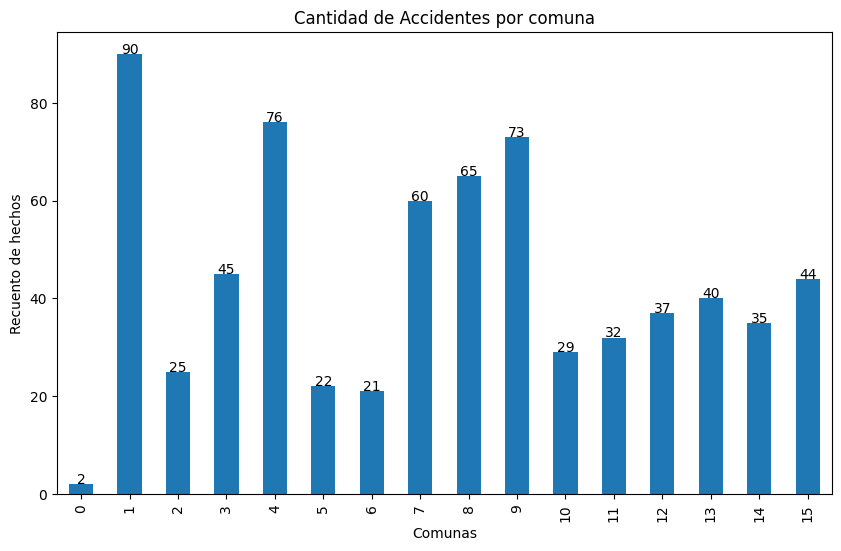

In [62]:
m_x = 'Comunas'
m_y = 'Recuento de hechos'
tit = 'Cantidad de Accidentes por comuna'
func = 0 # 0 para contar y 1 para sumar
graficar_barras(df, 'comuna', 'id_hecho', m_x, m_y, tit, func)

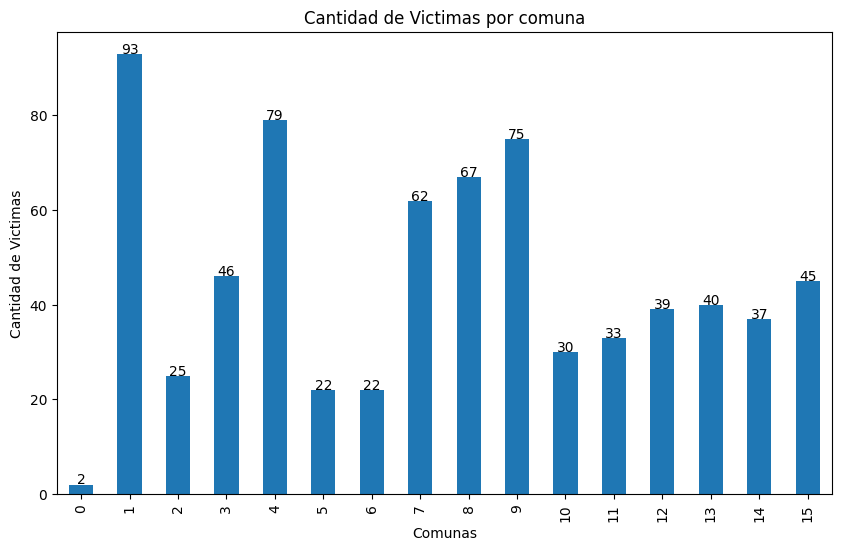

In [63]:
m_x = 'Comunas'
m_y = 'Cantidad de Victimas'
tit = 'Cantidad de Victimas por comuna'
func = 1 # 0 para contar y 1 para sumar
graficar_barras(df, 'comuna', 'n_victimas', m_x, m_y, tit, func)


In [56]:
# Agrupar por el año de la columna 'fecha' y sumar la cantidad de víctimas por año
df['year'] = df['fecha'].dt.year  # Crear una columna 'year' con el año de la fecha
resultados = df.groupby('year')['n_victimas'].sum()

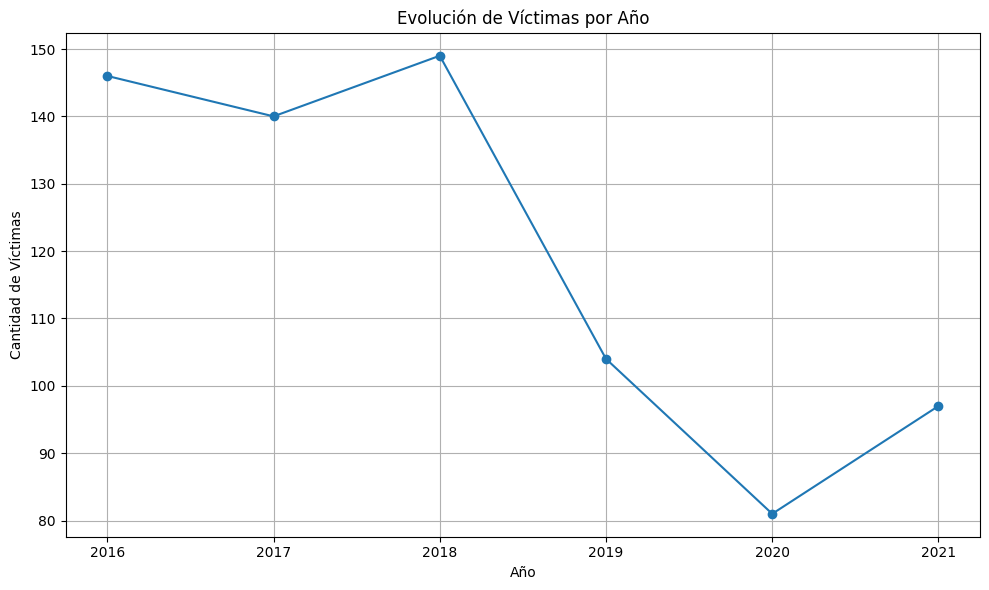

In [57]:

# Convertir el índice (años) en una columna para graficar
resultados = resultados.reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)

# Graficar la evolución de víctimas a lo largo del tiempo
plt.plot(resultados['year'], resultados['n_victimas'], marker='o', linestyle='-')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Evolución de Víctimas por Año')

# Mostrar el gráfico
plt.grid(True)  # Mostrar cuadrícula
plt.tight_layout()  # Ajustar diseño
plt.show()

<h2> ******************************************************************************************************************************</h2>

In [ ]:
df.to_csv('../CSV/hechos_nuevo.csv', index=False)

In [64]:
import requests

url = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/comunas/comunas.geojson'
archivo_destino = 'comunas.geojson'  # Nombre que quieras dar al archivo descargado

response = requests.get(url)

if response.status_code == 200:
    with open(archivo_destino, 'wb') as file:
        file.write(response.content)
    print(f"El archivo '{archivo_destino}' ha sido descargado correctamente.")
else:
    print("No se pudo descargar el archivo.")

El archivo 'comunas.geojson' ha sido descargado correctamente.
